##### Importing Packages

In [42]:
import pandas as pd
import numpy as np

##### Loading the dataset

In [43]:
data = pd.read_csv("german_credit.csv")

##### Look at the data / Data head

In [68]:
data.head()

,Credibility,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


##### Loading Features and Target

In [69]:
X = data.iloc[:, 1:21].values  
y = data.iloc[:, 0].values

##### Split Train and Test Sets

In [70]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

##### Gini Index Metric

In [71]:
from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier(criterion = 'gini', max_depth=5, min_samples_leaf=5).fit(X_train,y_train)
my_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5).fit(X_train,y_train)

##### Predict Metric

In [72]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = my_tree.predict(X_test)
print(np.mean(y_pred != y_test)) # Error rate
print(confusion_matrix(y_test, y_pred)) # Confusion Matrix
print(classification_report(y_test, y_pred)) # Classification Report
print("The prediction accuracy is: ",my_tree.score(X_test,y_test)*100,"%")

0.295
[[ 21  36]
 [ 23 120]]
              precision    recall  f1-score   support

           0       0.48      0.37      0.42        57
           1       0.77      0.84      0.80       143

   micro avg       0.70      0.70      0.70       200
   macro avg       0.62      0.60      0.61       200
weighted avg       0.69      0.70      0.69       200

The prediction accuracy is:  70.5 %


##### Entropy Metric

In [73]:
# tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, min_samples_leaf=5).fit(X_train,y_train)
my_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5).fit(X_train,y_train)

##### Prediction (Criteria = Entropy)

In [74]:
y_pred = my_tree.predict(X_test)
print(np.mean(y_pred != y_test)) # Error rate
print(confusion_matrix(y_test, y_pred)) # Confusion Matrix
print(classification_report(y_test, y_pred)) # Classification Report
print("The prediction accuracy is: ",my_tree.score(X_test,y_test)*100,"%")

0.265
[[ 24  33]
 [ 20 123]]
              precision    recall  f1-score   support

           0       0.55      0.42      0.48        57
           1       0.79      0.86      0.82       143

   micro avg       0.73      0.73      0.73       200
   macro avg       0.67      0.64      0.65       200
weighted avg       0.72      0.73      0.72       200

The prediction accuracy is:  73.5 %


##### Trying to convert some numeric values

In [87]:
i = 0
while i < 1000:
    data.loc[i,'Age (years)'] = int(data.loc[i,'Age (years)'])
    if data.loc[i,'Age (years)'] < 10:
        data.loc[i,'Age (years)'] = 5
    elif data.loc[i,'Age (years)'] < 20:
        data.loc[i,'Age (years)'] = 15
    elif data.loc[i,'Age (years)'] < 30:
        data.loc[i,'Age (years)'] = 25
    elif data.loc[i,'Age (years)'] < 40:
        data.loc[i,'Age (years)'] = 35
    elif data.loc[i,'Age (years)'] < 50:
        data.loc[i,'Age (years)'] = 45
    elif data.loc[i,'Age (years)'] < 60:
        data.loc[i,'Age (years)'] = 55
    elif data.loc[i,'Age (years)'] < 70:
        data.loc[i,'Age (years)'] = 65
    elif data.loc[i,'Age (years)'] < 80:
        data.loc[i,'Age (years)'] = 75
    elif data.loc[i,'Age (years)'] < 90:
        data.loc[i,'Age (years)'] = 85
    else:
         data.loc[i,'Age (years)'] = 100
    
    i = i+1

In [88]:
data.head()

,Credibility,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,25,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,35,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,25,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,35,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,35,1,2,2,2,1,1,2


##### Predict Metric (Criteria = Entropy)

In [89]:
y_pred = my_tree.predict(X_test)
print(np.mean(y_pred != y_test)) # Error rate
print(confusion_matrix(y_test, y_pred)) # Confusion Matrix
print(classification_report(y_test, y_pred)) # Classification Report
print("The prediction accuracy is: ",my_tree.score(X_test,y_test)*100,"%")

0.265
[[ 24  33]
 [ 20 123]]
              precision    recall  f1-score   support

           0       0.55      0.42      0.48        57
           1       0.79      0.86      0.82       143

   micro avg       0.73      0.73      0.73       200
   macro avg       0.67      0.64      0.65       200
weighted avg       0.72      0.73      0.72       200

The prediction accuracy is:  73.5 %


##### Visualization

<function matplotlib.pyplot.show(*args, **kw)>

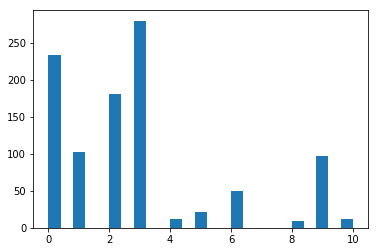

In [90]:
import matplotlib.pyplot as plt
plt.hist(data.Purpose.values, bins='auto')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

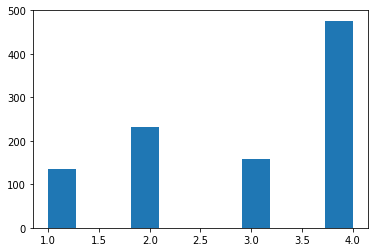

In [91]:
import matplotlib.pyplot as plt
plt.hist(data.Instalment.values, bins='auto')
plt.show

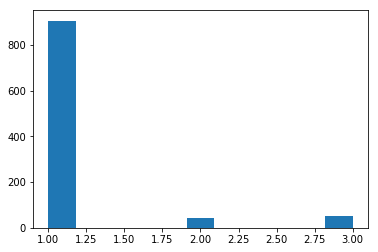

In [92]:
import matplotlib.pyplot as plt
plt.hist(data.Guarantors.values, bins='auto') 
plt.show()

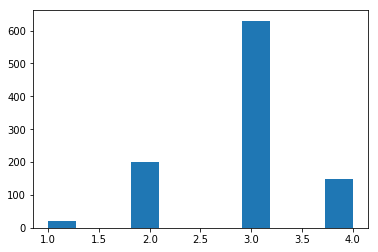

In [93]:
import matplotlib.pyplot as plt
plt.hist(data.Occupation.values, bins='auto') 
plt.show()

In [94]:
# Grouping the data as per Creditability
data.groupby('Credibility').count()

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
Credibility,,,,,,,,,,,,,,,,,,,,
0,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300
1,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700


##### Tree Visualization

In [20]:
from sklearn import tree
import collections
import pydotplus
import graphviz
data_feature_names = data.columns[1:21].values
dot_data = tree.export_graphviz(my_tree,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('output1.png')

True

In [21]:
# Feature Importance
my_tree.feature_importances_

array([0.33869926, 0.17487749, 0.12372522, 0.04269235, 0.08533713,
       0.09277385, 0.        , 0.        , 0.        , 0.01764135,
       0.01651012, 0.        , 0.0655822 , 0.02360272, 0.0087783 ,
       0.        , 0.00978001, 0.        , 0.        , 0.        ])

In [22]:
# Feature Name
data_feature_names

array(['Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'], dtype=object)

No handles with labels found to put in legend.


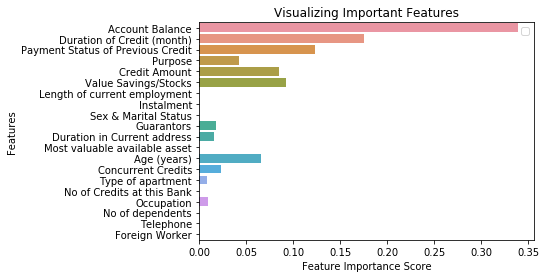

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=my_tree.feature_importances_, y=data_feature_names)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

##### Dropping a column

In [44]:
data = data.drop(columns=['Concurrent Credits'])

##### Look at the data

In [50]:
data.head()

,Credibility,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,1,4,2,21,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,1,4,1,23,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,1,2,1,39,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,1,4,2,38,2,2,2,1,1,2


##### Loading Features and Target

In [51]:
X = data.iloc[:, 1:20].values  
y = data.iloc[:, 0].values

##### Split Train and Test Sets

In [52]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

##### Gini Index Metric

In [53]:
from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier(criterion = 'gini', max_depth=5, min_samples_leaf=5).fit(X_train,y_train)
my_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5).fit(X_train,y_train)

##### Predict Metric

In [54]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = my_tree.predict(X_test)
print(np.mean(y_pred != y_test)) # Error rate
print(confusion_matrix(y_test, y_pred)) # Confusion Matrix
print(classification_report(y_test, y_pred)) # Classification Report
print("The prediction accuracy is: ",my_tree.score(X_test,y_test)*100,"%")

0.26
[[ 26  26]
 [ 26 122]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        52
           1       0.82      0.82      0.82       148

   micro avg       0.74      0.74      0.74       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.74      0.74      0.74       200

The prediction accuracy is:  74.0 %
